In [190]:
import numpy as np

def env():
    # 定义系统的A和B矩阵
    A = np.array([[0, 0, 0, 0], 
                    [-2, -5, -10, 0], 
                    [1, 2, -2, 1], 
                    [1, 0, 0, -2]])  # 系统矩阵 A
    B = np.array([[1, 0],
                    [-1, 0], 
                    [-1, 2], 
                    [1, 1]])  # 系统矩阵 B
    return A, B
    

def init_state():
    # 初始化算法参数
    
    n = 4  # 系统状态维度
    m = 2  # 控制输入维度
    
    # 定义初始化K矩阵
    K_i_0 = np.zeros((m, n))
    #print(x_0)
    
    # 初始矩阵 P_i^j 
    P_i_j = np.eye(n)  
    return n, m, K_i_0, P_i_j

In [191]:
# import numpy as np

# # 创建两个二维数组
# a = np.array([[1, 2], [3, 4]])
# b = np.array([[5, 6], [7, 8]])

# # 使用 np.hstack() 将它们堆叠起来
# c = np.hstack((a, b))
# # 从二维数组中提取第二列
# second_column = c[:, 1]
# print(second_column)
# print(2*c)
# print(c)


In [192]:
import matplotlib.pyplot as plt
# 画出 x_data 的图，每行一张图
def plot_data(x_data):
    print(x_data.shape)
    plt.figure(figsize=(10, 6))
    for i in range(x_data.shape[0]):
        plt.plot(range(x_data.shape[1]), x_data[i, :], label=f'x_data row {i+1}')
        plt.xlabel('Time Step')
        plt.ylabel('Value')
        plt.title(f'x_data row {i+1} Plot')
        plt.grid(True)
        plt.show()
# x_data = np.random.rand(4, 100)
# plot_x_data(x_data)

In [193]:

# 采样
def sample(n, m, K):
    # 获取A，B
    A, B = env()

    # 时间间隔，用于环境中的数据采样
    time_intervals = np.arange(0, n*(n+1)/2+n*m)  # 样本时间间隔

    # 随机初始化状态x_i
    x_i = np.random.rand(n, 1)   

    # 数据收集，存放x_i的每个采样状态，用于计算 Ψ_i、Φ_i、Π_i 矩阵
    x_data = np.zeros((n, 1))
    xi_data = np.zeros((m, 1))

    # 采样循环
    for t in range(0, len(time_intervals)):
        # 生成一个 大小2x1 的 Gaussian 噪声数组
        gaussian_noise = np.random.normal(0, 1, (m, 1))
        # print(gaussian_noise)

        # 计算控制输入 ξ_i,大小m*1和下一个状态的导数x_i_d,大小n*1
        xi_i = K @ x_i + gaussian_noise
        x_i_d = A @ x_i + B @ xi_i

        # 求下一个状态,n*1
        x_i_next = integrate_2d_array(x_i_d)

        # 收集状态,添加一列数据
        x_data = np.hstack((x_data, x_i))
        xi_data = np.hstack((xi_data, xi_i))
        # print("------------")
        # print(x_data)
        # 更新至下一个状态
        x_i = x_i_next
        #print(x_i)

    # 删除掉初始时全为0的第一列元素
    x_data = np.delete(x_data, 0, axis=1) 
    xi_data = np.delete(xi_data, 0, axis=1) 
    # print(x_data.shape) # 4*18
    return x_data, xi_data
    
    

In [194]:
# import numpy as np
# import matplotlib.pyplot as plt

# # 状态空间矩阵
# A = np.array([[0, 0, 0, 0],
#               [-2, -5, -10, 0],
#               [1, 2, -2, 1],
#               [1, 0, 0, -2]])
# B = np.array([[1, 0],
#               [-1, 0],
#               [-1, 2],
#               [1, 1]])

# # 初始状态向量（四维，改为 4*1 的二维数组）
# x0 = np.random.normal(0, 1, (4, 1))

# # 输入向量（高斯噪声，均值为0，方差为1）
# num_steps = 18  # 时间步数
# u = np.random.normal(0, 1, (2, num_steps))  # 生成一个 2行、num_steps 列的二维数组
# # 时间步长
# dt = 1

# # 离散状态空间响应函数
# def discrete_state_space_response(A, B, x0, u, dt, num_steps):
#     n = A.shape[0]
#     x = np.zeros((n, num_steps))  # 修改为二维数组，每列表示一个状态在不同时间步的值
#     x[:, 0] = x0.flatten()  # 初始化第一个时间步的状态
#     A_d = np.eye(n) + A * dt
#     B_d = B * dt
#     for k in range(1, num_steps):
#         x[:, k] = A_d @ x[:, k - 1] + B_d @ u[:, k]
#     return x

# # 使用函数模拟系统响应
# x = discrete_state_space_response(A, B, x0, u, dt, num_steps)

# # 绘图，所有状态在一张图里
# plt.figure(figsize=(12, 8))
# for i in range(x.shape[0]):
#     plt.plot(np.arange(0, num_steps * dt, dt), x[i, :], label=f'State x{i + 1}')
# plt.xlabel('Time (s)')
# plt.ylabel('State Values')
# plt.title('State Variables Over Time with Gaussian Noise Input')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [195]:
# import numpy as np  
# import matplotlib.pyplot as plt  

# # 状态空间矩阵  
# A = np.array([[0, 0, 0, 0],  
#               [-2, -5, -10, 0],  
#               [1, 2, -2, 1],  
#               [1, 0, 0, -2]])  
# B = np.array([[1, 0],  
#               [-1, 0],  
#               [-1, 2],  
#               [1, 1]])  

  
# # 初始状态向量（四维，随机生成）  
# x0 = np.random.normal(0, 1, 4)  


# # 输入向量（高斯噪声，均值为0，方差为1）  
# num_steps = 18  # 时间步数  
# u = np.random.normal(0, 1, (num_steps, 2))  # 生成一个num_steps行、2列的二维数组  
# # 时间步长  
# dt = 1  


# # 离散状态空间响应函数（确保您已经定义了这个函数）  
# def discrete_state_space_response(A, B, x0, u, dt, num_steps):  
#     n = A.shape[0]  
#     x = np.zeros((num_steps, n))  # 作为x_data
#     x[0] = x0
#     A_d = np.eye(n) + A * dt  
#     B_d = B * dt  
#     for k in range(1, num_steps):  
#         x[k] = A_d @ x[k-1] + B_d @ u[k]  

#     # print(x.shape)
#     #x = x.T
#     return x  

# # 使用函数模拟系统响应  
# x = discrete_state_space_response(A, B, x0, u, dt)  
# # 绘图  
# plt.figure(figsize=(12, 8))  
# plt.plot(np.arange(0, num_steps * dt, dt), x)  
# plt.xlabel('Time (s)')  
# plt.ylabel('State x')  
# plt.title('State Vector x Over Time with Gaussian Noise Input')  
# plt.legend(['x1', 'x2', 'x3', 'x4'])  
# plt.grid(True)  
# plt.show()

In [196]:
  
# 实现根据给定公式计算 x- 的函数
def compute_x_bar(n, x):
    x_bar = []
    for i in range(n):
        for j in range(i, n):
            if i == j:
                x_bar.append(x[i, 0] ** 2)
            else:
                x_bar.append(2 * x[i, 0] * x[j, 0])
    return np.array(x_bar).reshape(n * (n + 1) // 2, 1)

# 实现对二维数组积分的函数
def integrate_2d_array(array):
    return np.cumsum(np.cumsum(array, axis=0), axis=1)

def get_Psi_i(n, x_data):
    # 初始化Ψ_i矩阵
    Psi_i = np.zeros((n*n, 1))

    column = x_data.shape[1]
    for t in range(column):
        x_i = x_data[:, t] # 提出一列元素变为一维数组
        x_i = x_i.reshape(-1,1) # 转为二维数组4*1
        #print(x_i.shape)
        Psi_i = np.hstack((Psi_i, np.kron(x_i, x_i)))
    Psi_i = np.delete(Psi_i, 0, axis=1) # 删除掉初始时全为0的第一列元素
    Psi_i = Psi_i.T
    #print(Psi_i.shape)
    return Psi_i

# 计算Φ_i, 和 Π_i 矩阵，从而获得Γ_i 矩阵
def get_Gamma(n, m, x_data, xi_data):
    # # 采样
    # x_data, xi_data = sample(n, m, K)

    # 定义 Ψ_i, Φ_i, 和 Π_i 矩阵
    Phi_i = np.zeros((n*(n+1)//2, 1))
    Pi_i = np.zeros((n*m, 1))

    # 计算Ψ_i矩阵
    Psi_i = get_Psi_i(n, x_data)

    # 计算Φ_i矩阵
    column = x_data.shape[1]
    for t in range(column):
        x_i = x_data[:, t] # 提出一列元素变为一维数组
        x_i = x_i.reshape(-1,1) # 转为二维数组4*1
        x_bar = compute_x_bar(n, x_i) # 求x-
        x_bar_intergral = integrate_2d_array(x_bar)
        Phi_i = np.hstack((Phi_i, x_bar_intergral))
    Phi_i = np.delete(Phi_i, 0, axis=1) # 删除掉初始时全为0的第一列元素
    Phi_i = Phi_i.T
    #print(Phi_i.shape) #18*10

    # 计算Π_i 矩阵
    for t in range(column):
        x_i = x_data[:, t] # 提出一列元素变为一维数组
        x_i = x_i.reshape(-1,1) # 转为二维数组4*1
        xi_i = xi_data[:, t] # 提出一列元素变为一维数组
        xi_i = xi_i.reshape(-1,1) # 转为二维数组2*1
        x_Pi = np.kron(xi_i, x_i)
        x_Pi_intergral = integrate_2d_array(x_Pi) # 求积分
        Pi_i = np.hstack((Pi_i, x_Pi_intergral))
    Pi_i = np.delete(Pi_i, 0, axis=1) # 删除掉初始时全为0的第一列元素
    Pi_i = Pi_i.T
    #print(Pi_i.shape) #18*8


    # 计算 Γ_i 矩阵
    # print(Phi_i.shape)
    # print(Pi_i.shape)
    Gamma_i = np.hstack((Phi_i, 2 * Pi_i))
    # print(Gamma_i.shape)
    return Gamma_i



In [197]:
# 检查矩阵 Γ_i 是否满足秩条件
def check_Gamma(n, m, Gamma_i):
    if np.linalg.matrix_rank(Gamma_i) >= (n * (n + 1) // 2) + n * m:
        print("Gamma_i：{Gamma_i} 满足秩条件。")
    else:
        print("Gamma_i：{Gamma_i} 不满足秩条件。")

# 检查 P 矩阵是否符合公式 A.T * P + P * A - P * B * B.T * P + Q = 0
def check_P_matrix(Q, P):
    # 获取A，B
    A, B = env()
    left_side = A.T @ P + P @ A - P @ B @ B.T @ P + Q
    is_valid_p = np.allclose(left_side, np.zeros_like(left_side))
    print("P 矩阵是否符合公式: ", is_valid_p)



In [198]:
import numpy as np

def recover_matrices(n, m, vecs_h, vec_k):
    # 还原 H_i^j 矩阵
    h_matrix = np.zeros((n, n))
    index = 0
    for i in range(n):
        for j in range(i, n):
            if i == j:
                h_matrix[i, j] = vecs_h[index]
            else:
                h_matrix[i, j] = vecs_h[index]
                h_matrix[j, i] = vecs_h[index]
            index += 1

    # 还原 K_i^j 矩阵
    k_matrix = np.zeros((m, n))
    index = 0
    for i in range(m):
        for j in range(i, n):
                k_matrix[i, j] = vec_k[index]
                index += 1
    return h_matrix, k_matrix

# 计算 Hj 和 Kj 的辅助函数,对应公式（10）
def compute_H_K(n, m, gamma_i, psi_i, p_i):
    # 计算 (Gamma_i^T * Gamma_i)^(-1)
    gamma_t_gamma = np.dot(gamma_i.T, gamma_i)
    gamma_t_gamma_inv = np.linalg.inv(gamma_t_gamma)
    
    # 计算 Gamma_i^T * Psi_i
    gamma_t_psi = np.dot(gamma_i.T, psi_i)
    
    # 将 P_i 向量化
    p_i_vec = p_i.flatten()
    
    # 计算结果向量
    result = np.dot(gamma_t_gamma_inv, np.dot(gamma_t_psi, p_i_vec))
    # print(result.shape)
    # 提取 vecs(H_i^j) 和 vec(K_i^j)
    size_h = 10
    vecs_h = result[:size_h]
    vec_k = result[size_h:]
    # print(vecs_h.shape)
    # print(vec_k.shape)
    return recover_matrices(n, m, vecs_h, vec_k)





# # 示例调用
# n = 4
# r = 18
# p_i = np.random.rand(n, 1)
# vecs_h, vec_k = compute_H_K(gamma_i=gamma_i, psi_i=psi_i, p_i=p_i)
# print("vecs(H_i^j):", vecs_h)
# print("vec(K_i^j):", vec_k)


(4, 18)


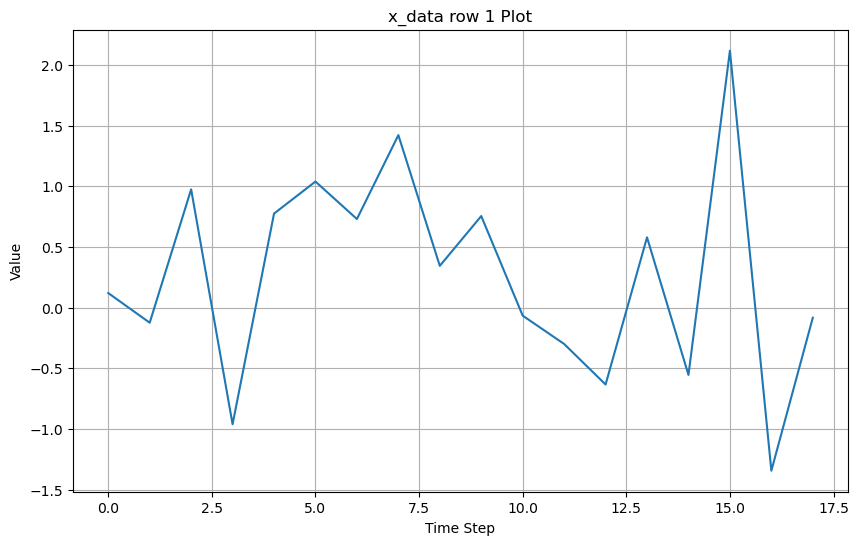

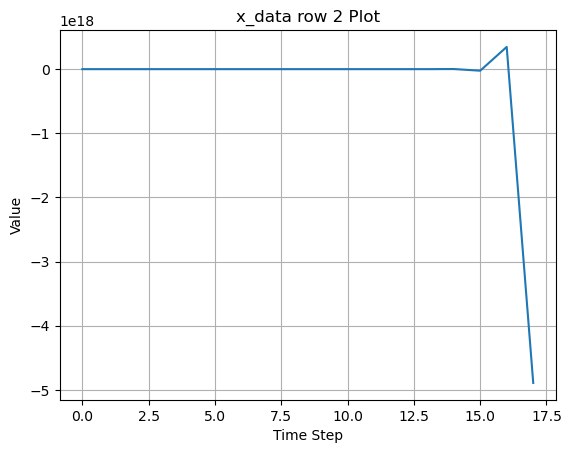

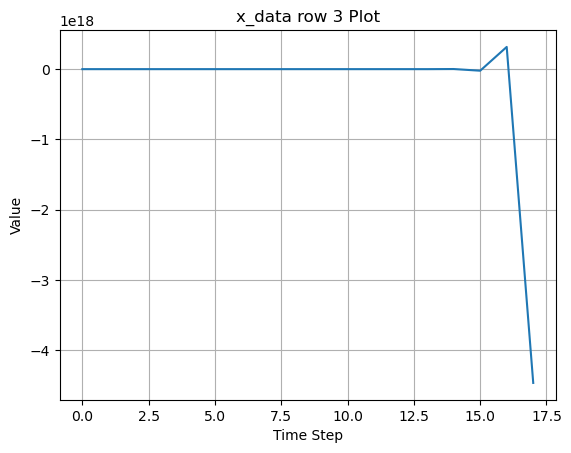

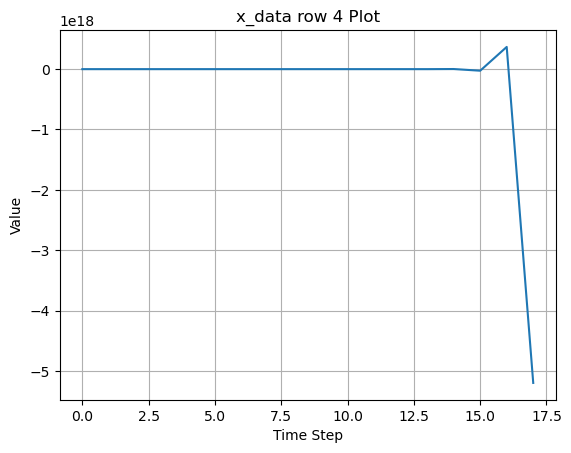

(2, 18)


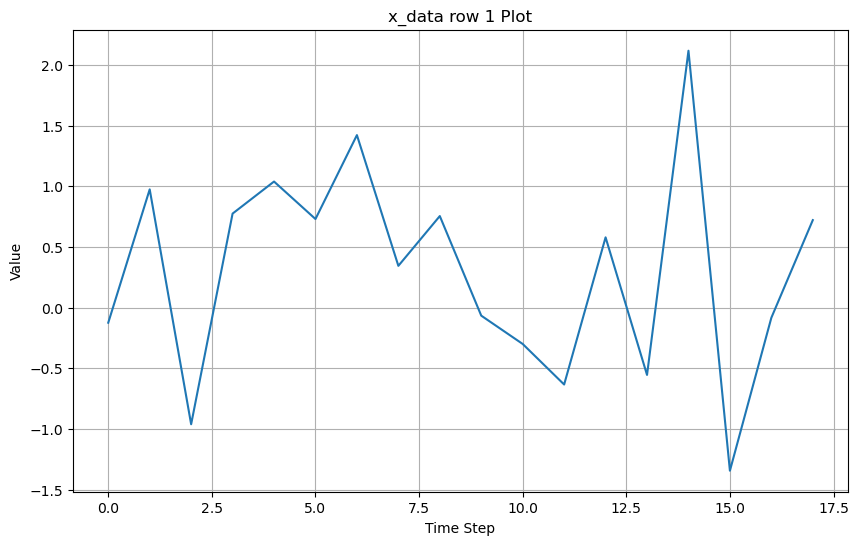

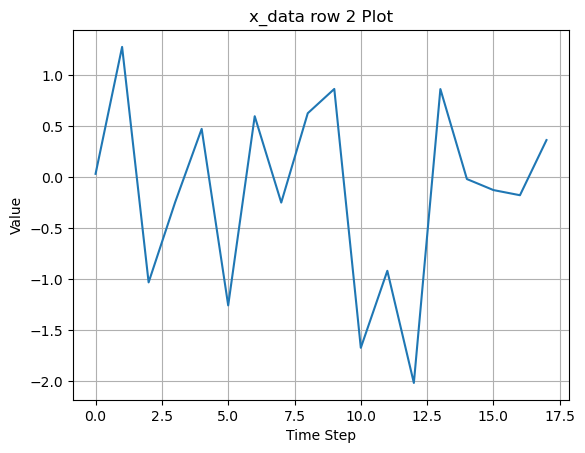

Gamma_i：{Gamma_i} 不满足秩条件。
Maximum iterations reached without convergence.
最终反馈增益矩阵 K: [[ 5.85911991e+37 -1.91823752e+33 -6.66096465e+32  2.25923146e+33]
 [ 0.00000000e+00 -1.96246605e+33  1.70826378e+33 -1.00203778e+33]]


In [199]:

# 定义更新 P_i_j 的函数
def update_P(P_i_j, H_i_j, Q, K_i_j, delta_j):
    return P_i_j + delta_j * (H_i_j + Q - (K_i_j.T @ K_i_j))


# 主循环进行算法迭代
def solve_K(max_iters=1000):
    n, m, K_i_j, P_i_j = init_state()
    # 初始化 P_i_j_0, K_i_j_prev,和迭代计数器 j,k
    P_i_j_0 = P_i_j
    K_i_j_prev = K_i_j
    j = 0
    k = 1

    # 控制算法的参数初始化
    epsilon = 1
    Q = np.eye(4)

    # 采样
    x_data, xi_data = sample(n, m, K_i_j)
    
    plot_data(x_data)
    plot_data(xi_data)

    #获取相关矩阵信息
    Psi_i = get_Psi_i(n, x_data)
    Gamma_i = get_Gamma(n, m, x_data, xi_data)
    #print("Psi_i",Psi_i)
    #print("Gamma_i",Gamma_i)
    # 检查矩阵 Γ_i 是否满足秩条件
    check_Gamma(n, m, Gamma_i)
    
    while j <= max_iters:
        # 计算 Hj 和 Kj
        H_i_j, K_i_j = compute_H_K(n, m, Gamma_i, Psi_i, P_i_j)

        # 计算学习率
        delta_j = 1 / (j + 1)

        # 更新 P_i_j
        P_i_j_next = update_P(P_i_j, H_i_j, Q, K_i_j, delta_j)

        # 限制 P 矩阵的范数
        if np.linalg.norm(P_i_j_next, ord='fro') > 10 * (k + 1):
            P_i_j = P_i_j_0
            k = k + 1
        # 判断收敛条件
        elif np.linalg.norm(P_i_j_next - P_i_j, ord='fro') < epsilon:
            check_P_matrix(Q, P_i_j)
            print(np.linalg.norm(P_i_j_next - P_i_j, ord='fro'))
            print(f"P_i_j:{P_i_j}")
            print(f"Converged at iteration {j}")
            return K_i_j
        # 否则继续迭代
        else :
            P_i_j = P_i_j_next
            
        j += 1
    
    print("Maximum iterations reached without convergence.")
    return K_i_j


K_i_final = solve_K()
print("最终反馈增益矩阵 K:", K_i_final)
